# Вычисление производных

[К оглавлению](_contents.ipynb)

Многие методы оптимизации требуют в явном виде первые или вторые производные функций одной переменной, либо матрицы Якоби/Гессе для функций нескольких переменных. Вывод аналитических выражений для производных часто является трудоемким процессом, в котором легко допустить ошибку. Если производная вычислена неправильно, то метод оптимизации не сможет найти экстремум.

В этом блокноте показаны примеры вычисления производных с помощью функций пакетов `scipy` и `sympy`.

# Тестовые функции


Рассмотрим две функции одной переменной:

$$ f(x) = x^4 - 36 x^2 - 64 x $$

и 

$$ g(x) = \frac{\sin x^2}{x} $$

И одну функцию двух переменных - [тестовую функцию Химмельблау](https://ru.wikipedia.org/wiki/Функция_Химмельблау):

$$ h(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2 $$

## Графики функций

In [1]:
# Подключение пакетов
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'font.size': 14})

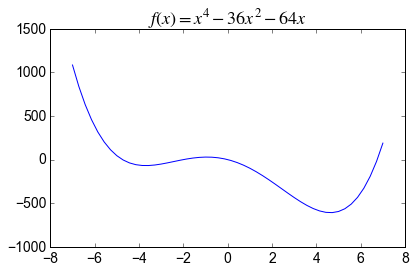

In [2]:
# График функции f(x) 

# Задаем функцию:
f = lambda x : x**4 - 36 * x**2 - 64 * x

# Диапазон изменения x
xf = np.linspace(-7, 7)

# График
plt.plot(xf, f(xf));
plt.title('$f(x)=x^4 - 36x^2 - 64 x$', fontsize=18)
plt.tight_layout();

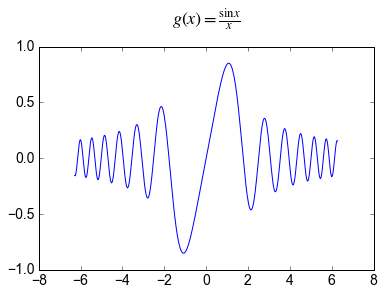

In [3]:
# График функции g(x) 

# Задаем функцию:
g = lambda x : np.sin(x**2)/x

# Диапазон изменения x
xg = np.linspace(-2*np.pi, 2*np.pi, 400)

# График
plt.plot(xg, g(xg))
plt.title(r'$g(x)=\frac{\sin x}{x}$', fontsize=18, y=1.08);

График построен некорректно, в точке 0 должен быть разрыв

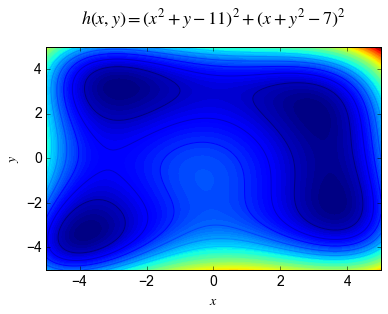

In [4]:
# График функции h(x, y)

# Задаем функцию:
h = lambda x, y : (x**2 + y - 11)**2 + (x + y**2 -7)**2


# Диапазон изменения x
xh = np.linspace(-5, 5, 101)
yh = xh

# Координаты узлов сетки:
X, Y = np.meshgrid(xh, yh)


# График
plt.contourf(X,Y,h(X, Y), 100)
plt.contour(X,Y,h(X,Y), 20)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title(r'$h(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2 $', fontsize=18, y=1.08);

График поверхности:
![Функция Химмельблау](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Himmelblau_function.svg/640px-Himmelblau_function.svg.png
"Функция Химмельблау")

# Аналитические преобразования с помощью sympy

Пакет символьных вычислений `sympy` позволяет выполнять аналитические преобразования с выражениями - формулами, составленными из имен переменных, чисел, арифметических операций и функций. Для решения задач оптимизации полезны возможности аналитического вычисления производных и частных производных любого порядка, а также матриц Якоби и Гессе.

In [5]:
# Подключение пакета
import sympy as sp
sp.init_printing()

## Определение выражений для функций в sympy

In [6]:
# Определяем символы для записи выражений:
x, y = sp.symbols('x y')

# Определяем выражения для функций:
fs = x**4 - 36 * x**2 - 64 * x
gs = sp.sin(x**2)/x
hs = (x**2 + y - 11)**2 + (x + y**2 -7)**2

# Проверка
[fs, gs, hs]

## Вычисление выражений для производных в sympy

In [7]:
# Первая и вторая производная для f(x)
fs_prime = fs.diff(x)
fs_second= fs.diff(x, 2) # или fs.diff(x, x)

# Результаты:
[fs_prime, fs_second]

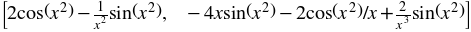

In [8]:
# Первая и вторая производная для g(x)
gs_prime = gs.diff(x)
gs_second= gs.diff(x, 2).expand() # раскрыть скобки в выражении

# Результаты:
[gs_prime, gs_second]

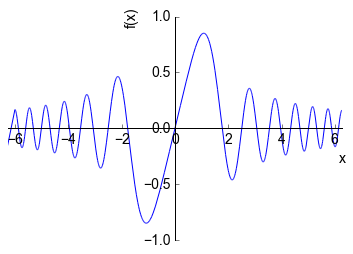

In [9]:
# График функции g(x)
sp.plot(gs, (x, -2*sp.pi, 2*sp.pi));

График функции $g(x)$ также построен некорректно: нет разрыва в нуле

In [10]:
# Частные производные для h(x,y)
hs_x = hs.diff(x).expand() #раскрыть скобки
hs_y = hs.diff(y).expand()

# Результаты:
[hs_x, hs_y]

In [11]:
# Частные производные второго порядка для h(x, y)
hs_xx = hs.diff(x, x).expand() # раскрыть скобки
hs_yy = hs.diff(y, y).expand()
hs_xy = hs.diff(x, y).expand()
hs_yx = hs.diff(y, x).expand()

# Результаты:
[hs_xx, hs_yy, hs_xy, hs_yx]

## Градиент, Якобиан и Гессиан

Для многих методов многомерной оптимизации необходимо передавать матрицы из частных производных:

**Градиент** функции $f(x_1,x_2, \ldots, x_n)$ - вектор, координатами которого являются частные производные функции по каждой переменной:

$$\nabla f(x_1,x_2, \ldots, x_n) = 
    \left[
        \frac{\partial f}{\partial x_1} 
        \frac{\partial f}{\partial x_2}
        \dots
        \frac{\partial f}{\partial x_n}        
    \right]^T
$$


** Якобиан** (матрица Якоби) для векторной функции $n$ переменных(системы уравнений): 

$$
\begin{cases}
f_1 = f_1(x_1, x_2, \ldots, x_n)\\
f_2 = f_2(x_1, x_2, \ldots, x_n)\\
\vdots\\
f_n = f_n(x_1, x_2, \ldots, x_n)
\end{cases}
$$


$$\mathbf J = \frac{d\mathbf f}{d\mathbf x} = \begin{bmatrix}
    \dfrac{\partial \mathbf{f}}{\partial x_1} & \cdots & \dfrac{\partial \mathbf{f}}{\partial x_n} \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial f_m}{\partial x_1} & \cdots & \dfrac{\partial f_m}{\partial x_n} \end{bmatrix}$$
    
    
Если система включает только одно уравнение для $f(x_1, \ldots, x_n)$, то якобиан содержит те же компоненты, что и градиент $\nabla f$. Отличие в том, что якобиан в этом случае - вектор-строка.

** Гессиан** (матрица Гессе) для функции $n$ переменных - матрица, составленная из частных производных 2 порядка этой функции, причем элемент в строке $i$ и столбце $j$:

$$\mathbf H_{i,j} = \frac{\partial^2 f}{\partial x_i \partial x_j}$$



$$\mathbf H = \begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_n} \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_n} \\[2.2ex]
  \vdots & \vdots & \ddots & \vdots \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_n\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_n\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

Градиент, Якобиан и Гессиан могут быть составлены вручную на основе выражений, полученных при аналитическом дифференцировании в sympy, однако есть удобные функции для автоматического получения этих матриц.

In [12]:
### Получение якобиана (градиента)

# Метод для вычисления якобиана есть у матрицы sympy:
M = sp.Matrix([hs]) # Матрица из уравнений (оно единственное)
X = sp.Matrix([x, y]) # Вектор из переменных
hs_J = sp.Matrix([hs]).jacobian(X)

sp.pprint(hs_J.expand())

⎡   3                     2          2              3            ⎤
⎣4⋅x  + 4⋅x⋅y - 42⋅x + 2⋅y  - 14  2⋅x  + 4⋅x⋅y + 4⋅y  - 26⋅y - 22⎦


Для вывода матриц в математическом представлении необходимо определить вспомогательную функцию. Автопечать не работает, если на компьютере не установлен $\LaTeX$


In [13]:
# Обход проблемы с отображением матриц - определяем функцию для их печати
# 
from IPython.display import  Math
def printMatrix(m):
    """
    Функция для вывода в блокнот матриц SymPy.
    Использование: printMatrix(Матрица)
    """
    return Math(sp.latex(m))

In [14]:
printMatrix(hs_J.expand())

<IPython.core.display.Math object>

In [15]:
# Для сравнения, частные производные h(x,y):
[hs_x, hs_y]

In [16]:
## Получение матрицы Гессе
hs_H = sp.hessian(hs, X)
printMatrix(hs_H)

<IPython.core.display.Math object>

In [17]:
# Для сравнения, частные производные функции h(x)
[hs_xx, hs_xy, hs_yx, hs_yy]

# Получение функций для численного вычисления производных

Мы получили аналитические выражения для производных. Для передачи использования пакета `scipy.optimize` необходимо задавать функции, вычисляющие якобиан и гессиан. Получив с помощью `sympy` выражения для компонентов этих матриц, можно задать необходимые функции вручную. Однако можно и автоматически получить на основе выражений `sympy` нужные функции для использования совместно с `scipy.optimize`, `numpy` или `matplotlib`. Для этого необходимо использовать функцию `lambdify()` пакета `sympy`.

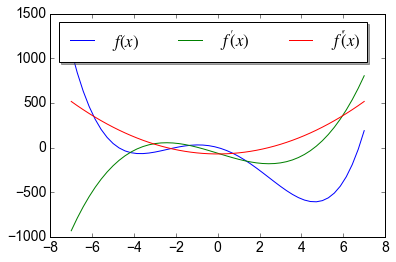

In [18]:
# Получение совместимых с numpy функций, вычисляющих значение выражений sympy

# Пример: производные тестовой функции f(x):
f_prime_n = sp.lambdify(x, fs_prime, 'numpy')
f_second_n = sp.lambdify(x, fs_second, 'numpy')

plt.plot(xf, f(xf), label='$f(x)$')
plt.plot(xf, f_prime_n(xf), label="$f'(x)$")
plt.plot(xf, f_second_n(xf), label="$f''(x)$")

plt.legend(loc='upper left', ncol=3, shadow=True);


In [19]:
# Пример: градиент (Якобиан) и гессиан для функции h(x, y)
hs_J_n = sp.lambdify((x, y), hs_J, 'numpy')
hs_J_n(0, 0)

matrix([[-14, -22]])

In [20]:
# Проверка:
[hs_x.subs(dict(x=0, y=0)), hs_y.subs(dict(x=0, y=0))]

In [21]:
hs_H_n = sp.lambdify((x, y), hs_H, 'numpy')
hs_H_n(0, 0)

matrix([[-42,   0],
        [  0, -26]])

In [22]:
# Проверка:
[hs_xx.subs(dict(x=0, y=0)), hs_xy.subs(dict(x=0, y=0)), 
 hs_yx.subs(dict(x=0, y=0)), hs_yy.subs(dict(x=0, y=0))]

# Оптимизация

In [23]:
# Подключение пакета scipy.optimize
import scipy.optimize as so

In [24]:
### Минимизация функции h(x,y)

h_n = lambda X: h(X[0], X[1]) # для оптимизации необходимы функции с одним векторным аргументом
h_J = lambda X: np.array(hs_J_n(X[0], X[1])).ravel() # нужен массив, содержащий вектор-столбец частных производных
h_H = lambda X: hs_H_n(X[0], X[1])

X0 = np.array([0, 0]) # Начальное приближение

In [25]:
# Используется метод BFGS, с численной оценкой якобиана и Гессиана
%timeit so.minimize(h_n, X0)

100 loops, best of 3: 1.88 ms per loop


In [26]:
# Используется метод BFGS, с численной оценкой якобиана и Гессиана
so.minimize(h_n, X0)

        x: array([ 2.99999989,  1.99999996])
      nit: 10
     njev: 16
  success: True
  message: 'Optimization terminated successfully.'
      fun: 6.15694370233122e-13
     nfev: 64
 hess_inv: array([[ 0.01575433, -0.00956965],
       [-0.00956965,  0.03491686]])
   status: 0
      jac: array([ -8.77780211e-06,  -3.52519449e-06])

In [27]:
# Используется метод Ньютона, якобиан задан, гессиан оценивается численно
%timeit so.minimize(h_n, X0, jac=h_J, method='Newton-CG')

100 loops, best of 3: 3.1 ms per loop


In [28]:
# Используется метод Ньютона, якобиан задан, гессиан оценивается численно
so.minimize(h_n, X0, jac=h_J, method='Newton-CG')

       x: array([ 3.,  2.])
    nhev: 0
     nit: 8
    njev: 44
 success: True
 message: 'Optimization terminated successfully.'
     fun: 2.862906161292868e-19
    nfev: 13
     jac: array([  2.11107934e-06,   2.45353055e-05])
  status: 0

In [29]:
# Используется метод Ньютона, якобиан и гессиан заданы
%timeit so.minimize(h_n, X0, jac=h_J, hess=h_H, method='Newton-CG')

100 loops, best of 3: 2.35 ms per loop


In [30]:
# Используется метод Ньютона, якобиан задан, гессиан оценивается численно
so.minimize(h_n, X0, jac=h_J, hess=h_H, method='Newton-CG')

       x: array([ 3.,  2.])
    nhev: 8
     nit: 8
    njev: 20
 success: True
 message: 'Optimization terminated successfully.'
     fun: 4.354755165978793e-24
    nfev: 13
     jac: array([  2.09040826e-06,   2.45512900e-05])
  status: 0

Использование вычисленных аналитически производных позволяет снизить количество вычислений функции (`nfev`) и якобиана (`njev`) при работе алгоритма оптимизации. Однако в данном случае выигрыша по времени вычислений не наблюдается, поскольку целевая функция вычисляется быстро. В задачах большей размерности использование аналитических выражений для производных может дать более выраженный эффект. 

Результате тестирования методов оптимизации на различных задачах и руководство по выбору метода можно прочитать [здесь](http://www.scipy-lectures.org/advanced/mathematical_optimization/index.html#id13).